In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ggpubr))
suppressMessages(library(ggridges))

DISEASE <- list.files("/data03/inamo/nanopore/RNA/210931_PB29_fastq/shiny/data/gwas/",pattern = "*_GRCh38_short.txt") %>% gsub("_GRCh38_short.txt","",.)
immune = c(
  "COVID19_HGI_A2",
  "PASS_Lupus",
  "PASS_Rheumatoid_Arthritis",
  "PASS_Multiple_sclerosis",
  "PASS_Primary_biliary_cirrhosis",
  "PASS_CD_deLange2017",
  "PASS_Crohns_Disease",
  "PASS_IBD_deLange2017",
  "PASS_IBD",
  "PASS_Celiac",
  "PASS_UC_deLange2017",
  "PASS_Ulcerative_Colitis",
  "PASS_AdultOnsetAsthma_Ferreira2019",
  "PASS_ChildOnsetAsthma_Ferreira2019",
  "UKB_460K.disease_AID_ALL",
  "UKB_460K.disease_AID_SURE",
  "UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED",
  "UKB_460K.disease_ASTHMA_DIAGNOSED",
  "UKB_460K.disease_HYPOTHYROIDISM_SELF_REP",
  "UKB_460K.disease_PSORIASIS",
  "Lopez_SSc",
  "Taylor_SjS",
  "Ishigaki_RA",
  "Patsopoulos_MS",
  "UKB_460K.disease_AOSD",
  "UKB_460K.disease_SpA_SELF_REP",
  "UKB_460K.disease_AS_SELF_REP")
CNS = c(
  "PASS_ADHD_Demontis2018",
  "PASS_AlzheimersMaternal_Marioni2018",
  "PASS_AlzheimersPaternal_Marioni2018",
  "PASS_AlzheimersProxy_Marioni2018",
  "PASS_Alzheimers_Jansen2019",
  "PASS_AnorexiaNervosa_Duncan_2017",
  "PASS_Autism_Grove2019",
  "PASS_BDSCZ_Ruderfer2018",
  "PASS_BIP_Stahl2019",
  "PASS_Bipolar_Disorder",
  "PASS_Depression_Nagel2018",
  "PASS_DS",
  "PASS_DepressedAffect_Nagel2018",
  "PASS_Epilepsy_Anney_2014",
  "PASS_Insomnia_Jansen2019",
  "PASS_Intelligence_SavageJansen2018",
  "PASS_MDD_Howard2019",
  "PASS_MDD_Wray2018",
  "PASS_Neuroticism",
  "PASS_Neuroticism_Nagel2018",
  "PASS_Parkinsons_23andMe_Corces2020",
  "PASS_Schizophrenia",
  "PASS_Schizophrenia_Pardinas2018",
  "PASS_Schizophrenia_Ruderfer2018",
  "PASS_SCZvsBD_Ruderfer2018",
  "UKB_460K.mental_NEUROTICISM",
  "Rheenen_ALS")
cancer = c(
  "PASS_BreastCancer",
  "PASS_OvarianCancer",
  "PASS_ProstateCancer",
  "UKB_460K.cancer_ALL",
  "UKB_460K.cancer_PROSTATE",
  "UKB_460K.cancer_BREAST",
  "UKB_460K.cancer_MELANOMA")
blood = DISEASE %>%
  .[grepl("UKB_460K.blood_",DISEASE)]
biochemistry = DISEASE %>%
  .[grepl("UKB_460K.biochemistry_",DISEASE)]
body = c(
  DISEASE %>%
    .[grepl("UKB_460K.body_",DISEASE)],
  "PASS_Height1"
)
CVD = c(
  "PASS_AtrialFibrillation_Nielsen2018",
  "PASS_CardioembolicStroke_Malik2018",
  "PASS_Coronary_Artery_Disease",
  "PASS_Coronary_Artery_Disease_Howson_2017",
  "PASS_IschemicStroke_Malik2018",
  "PASS_LargeArteryStroke_Malik2018",
  "UKB_460K.disease_CARDIOVASCULAR",
  "UKB_460K.bp_DIASTOLICadjMEDz",
  "UKB_460K.bp_SYSTOLICadjMEDz"
)
metabo = c(
  "PASS_BMI1",
  "PASS_FastingGlucose_Manning",
  "PASS_HDL",
  "PASS_HbA1C",
  "PASS_LDL",
  "PASS_Triglycerides",
  "PASS_Type_2_Diabetes",
  "UKB_460K.biochemistry_ApolipoproteinA",
  "UKB_460K.biochemistry_ApolipoproteinB",
  "UKB_460K.biochemistry_Cholesterol",
  "UKB_460K.biochemistry_Glucose",
  "UKB_460K.biochemistry_HDLcholesterol",
  "UKB_460K.biochemistry_HbA1c",
  "UKB_460K.biochemistry_LDLdirect",
  "UKB_460K.biochemistry_LipoproteinA",
  "UKB_460K.biochemistry_Triglycerides",
  "UKB_460K.body_BMIz",
  "UKB_460K.disease_DIABETES_ANY_DIAGNOSED",
  "UKB_460K.disease_HI_CHOL_SELF_REP",
  "UKB_460K.disease_T2D"
)
behavior = c(
  "PASS_AgeOfInitiation_Liu2019",
  "PASS_CigarettesPerDay_Liu2019",
  "PASS_DrinksPerWeek_Liu2019",
  "PASS_LongSleepDuration_Dashti2019",
  "PASS_ShortSleepDuration_Dashti2019",
  "PASS_SleepDuration_Dashti2019",
  "PASS_SmokingCessation_Liu2019",
  "PASS_SmokingInitiation_Liu2019",
  "UKB_460K.cov_SMOKING_STATUS",
  "UKB_460K.other_MORNINGPERSON"
)
repro = c(
  "PASS_AgeFirstBirth",
  "PASS_FetalBirthWeight_Warrington2019",
  "PASS_MaternalBirthWeight_Warrington2019",
  "PASS_Menarche2017",
  DISEASE %>%
    .[grepl("UKB_460K.repro_",DISEASE)]
)
intel = c(
  "PASS_Intelligence_SavageJansen2018",
  "PASS_Years_of_Education1",
  "PASS_Years_of_Education2",
  "UKB_460K.cov_EDU_COLLEGE",
  "UKB_460K.cov_EDU_YEARS"
)

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig06.RData")

[1] "five_utr_genes, MSigDB_Hallmark_2020"
[1] "three_utr_genes, MSigDB_Hallmark_2020"


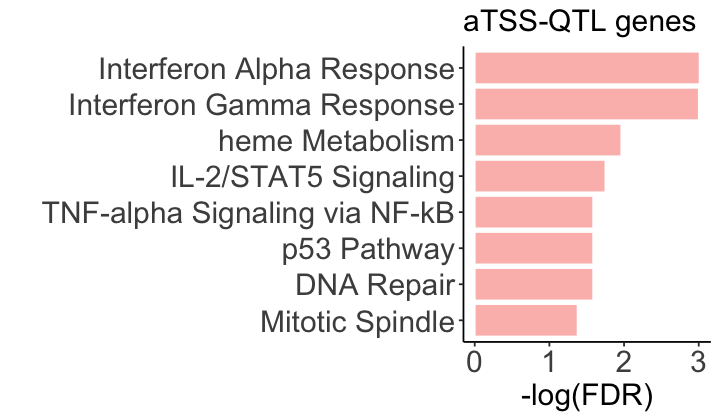

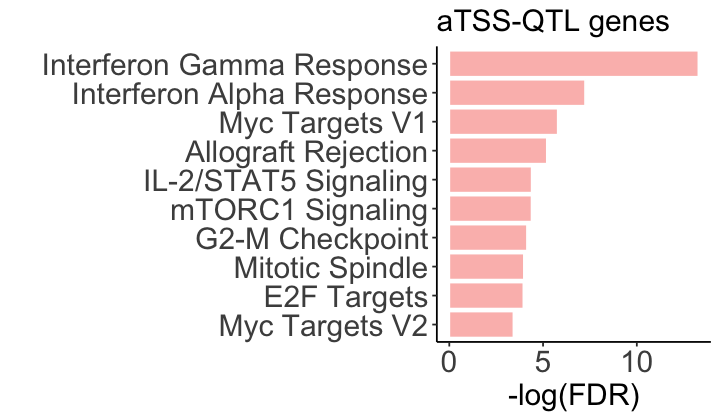

In [4]:
dbs <- c(# "GO_Biological_Process_2018","GO_Cellular_Component_2018","GO_Molecular_Function_2018",
         # "COVID-19_Related_Gene_Sets",
         "MSigDB_Hallmark_2020"
         # "WikiPathways_2019_Human",
         # "ProteomicsDB_2020",
         # "KEGG_2019_Human"
         # "GWAS_Catalog_2019",
         # "ClinVar_2019"
         # "ENCODE_TF_ChIP-seq_2015","TRRUST_Transcription_Factors_2019"
        )

options(repr.plot.width=6, repr.plot.height=3.5)
for (type in c("five_utr_genes",
               "three_utr_genes")){
  for (n in 1:length(dbs)){
    tryCatch({
      print(paste0(type, ", ", dbs[n]))
      pathway <- gsub("-","_",dbs[n])
      res <- read.table(paste0("../data/",type,"_",pathway,".txt"),header = TRUE,sep="\t")
      res$sig <- ifelse(res$Adjusted.P.value<0.05, "red", "grey")
      res = res[res$Adjusted.P.value<0.05,]
    if (type == "five_utr_genes") {
        title_lab = "aTSS-QTL genes"
        } else if (type == "five_utr_genes") {
        title_lab = "3'aQTL genes"
    }
    if (any(res$sig=="red")){
        res$logFDR <- -log10(res$Adjusted.P.value)
        res2 <- head(res[order(res$Adjusted.P.value, decreasing=FALSE),],10)
        res2$Term <- stringr::str_split(res2$Term, pattern = " \\(", simplify = TRUE)[,1]
        plot(ggplot(res2, aes(x=reorder(x = Term, X = logFDR, FUN = sum), y=logFDR,  fill=sig)) +
               geom_bar(stat="identity", color="white", alpha = 0.5, position=position_dodge()) +
               # scale_fill_manual(values = c("red" = "red", "grey" = "grey")) +
               xlab("") +
               ylab("-log(FDR)") +
               theme_classic() +
               coord_flip() +
               ggtitle(title_lab) +
               theme(strip.text.x=element_text(size=20, color="black", face="bold.italic"),
                     legend.position = "none",
                     plot.title = element_text(size=18),
                     axis.title.x = element_text(size=18),
                     axis.title.y = element_text(size =18),
                     axis.text.y = element_text(size = 18),
                     axis.text.x = element_text(size = 18),
                     legend.text =  element_text(size = 20),
                     legend.key.size = grid::unit(0.8, "lines"),
                     legend.title = element_text(size = 0, hjust = 0)) )
      }
    }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})
  }
}


Picking joint bandwidth of 12.8

Warning message:
“Removed 23922 rows containing non-finite values (stat_density_ridges).”


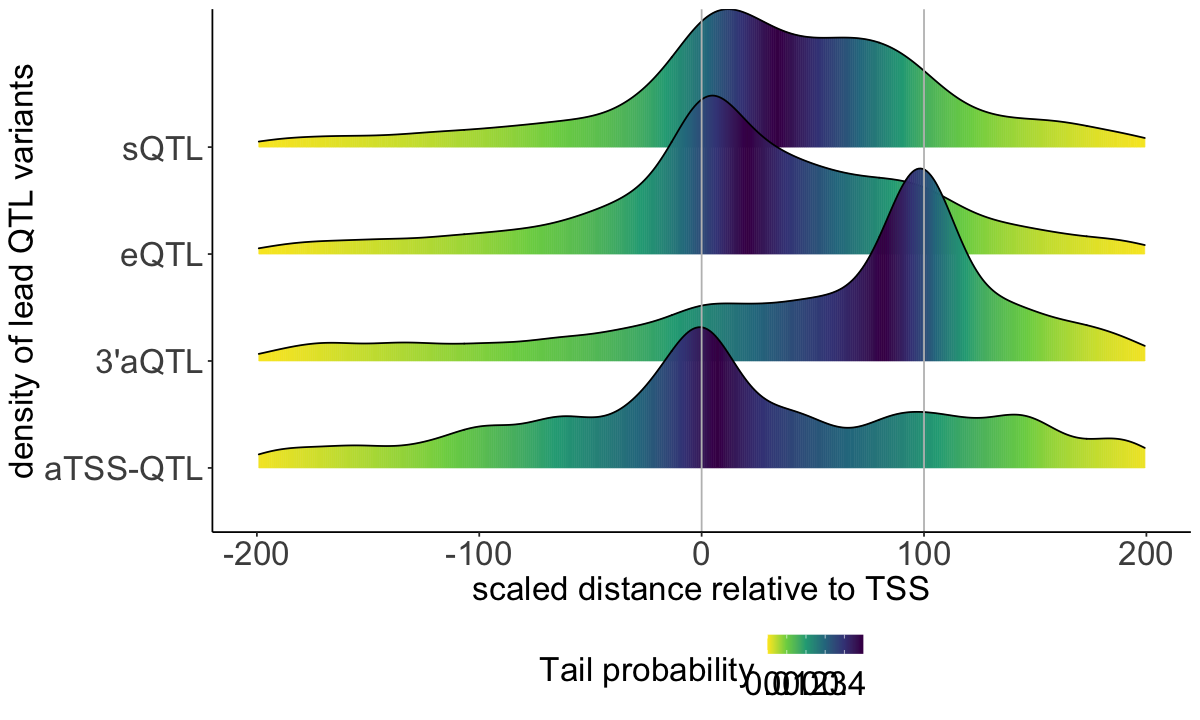

In [5]:
# distribution of lead QTL variants

options(repr.plot.width=10, repr.plot.height=6)
dat %>%
  dplyr::filter(rank==1) %>%
  dplyr::mutate(QTL = case_when(
    QTL == "5UTR" ~ "aTSS-QTL",
    QTL == "3UTR" ~ "3'aQTL",
    QTL == "cis" ~ "eQTL",
    QTL == "splicing" ~ "sQTL"
  ),
  QTL = factor(QTL,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL"))) %>%
  ggplot(., aes(x = scaled_pos, y = QTL, fill = 0.5 - abs(0.5 - stat(ecdf)))) + 
  ggridges::stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_viridis_c(name = "Tail probability", direction = -1) +
  xlim(c(-200,200)) +
  geom_vline(xintercept=0,col="grey") +
  geom_vline(xintercept=100,col="grey") +
  scale_color_npg() +
  theme_classic() +
  xlab("scaled distance relative to TSS") +
  ylab("density of lead QTL variants") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))

Picking joint bandwidth of 25.6

Warning message:
“Removed 13098 rows containing non-finite values (stat_density_ridges).”


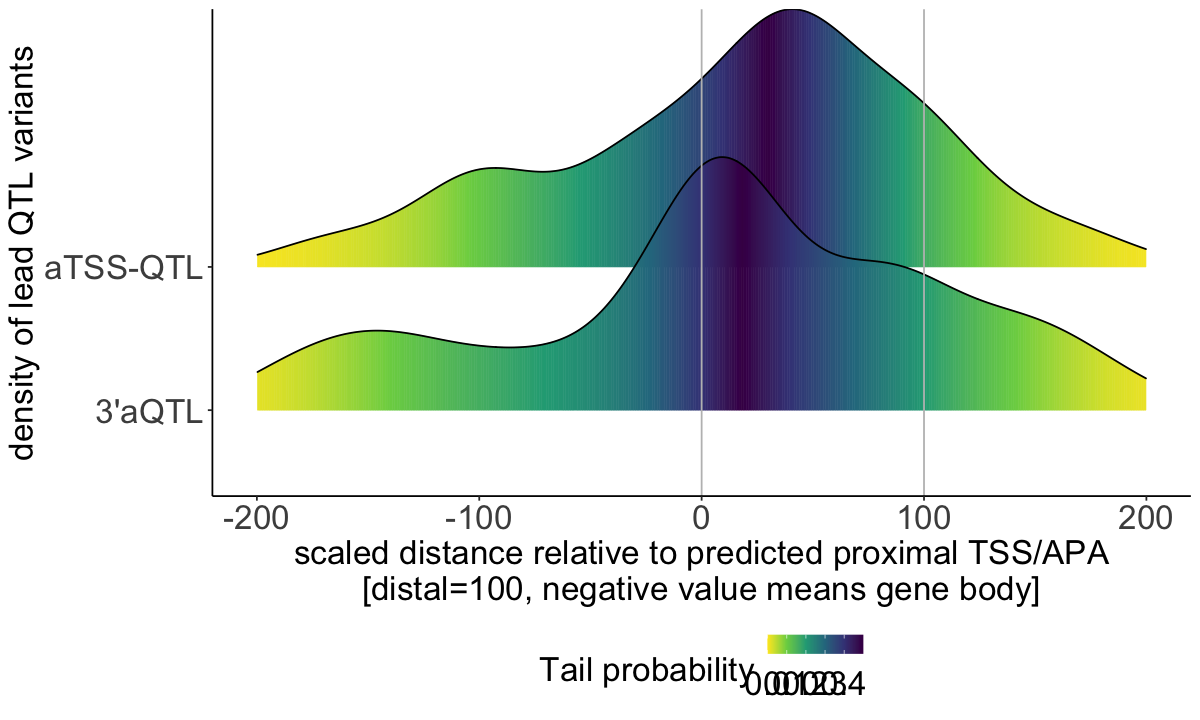

In [6]:
# distribution of lead QTL variants focusing on aTSS-QTL and 3'aQTL

options(repr.plot.width=10, repr.plot.height=6)
dat_utr %>%
  dplyr::mutate(QTL = case_when(
    QTL == "5UTR" ~ "aTSS-QTL",
    QTL == "3UTR" ~ "3'aQTL"
  )) %>%
  ggplot(., aes(x = scaled_pos, y = QTL, fill = 0.5 - abs(0.5 - stat(ecdf)))) + 
  ggridges::stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_viridis_c(name = "Tail probability", direction = -1) +
  xlim(c(-200,200)) +
  geom_vline(xintercept=0,col="grey") +
  geom_vline(xintercept=100,col="grey") +
  ggsci::scale_color_npg() +
  theme_classic() +
  xlab("scaled distance relative to predicted proximal TSS/APA\n[distal=100, negative value means gene body]") +
  ylab("density of lead QTL variants") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 20, hjust = 0))

`summarise()` has grouped output by 'QTL'. You can override using the `.groups`
argument.


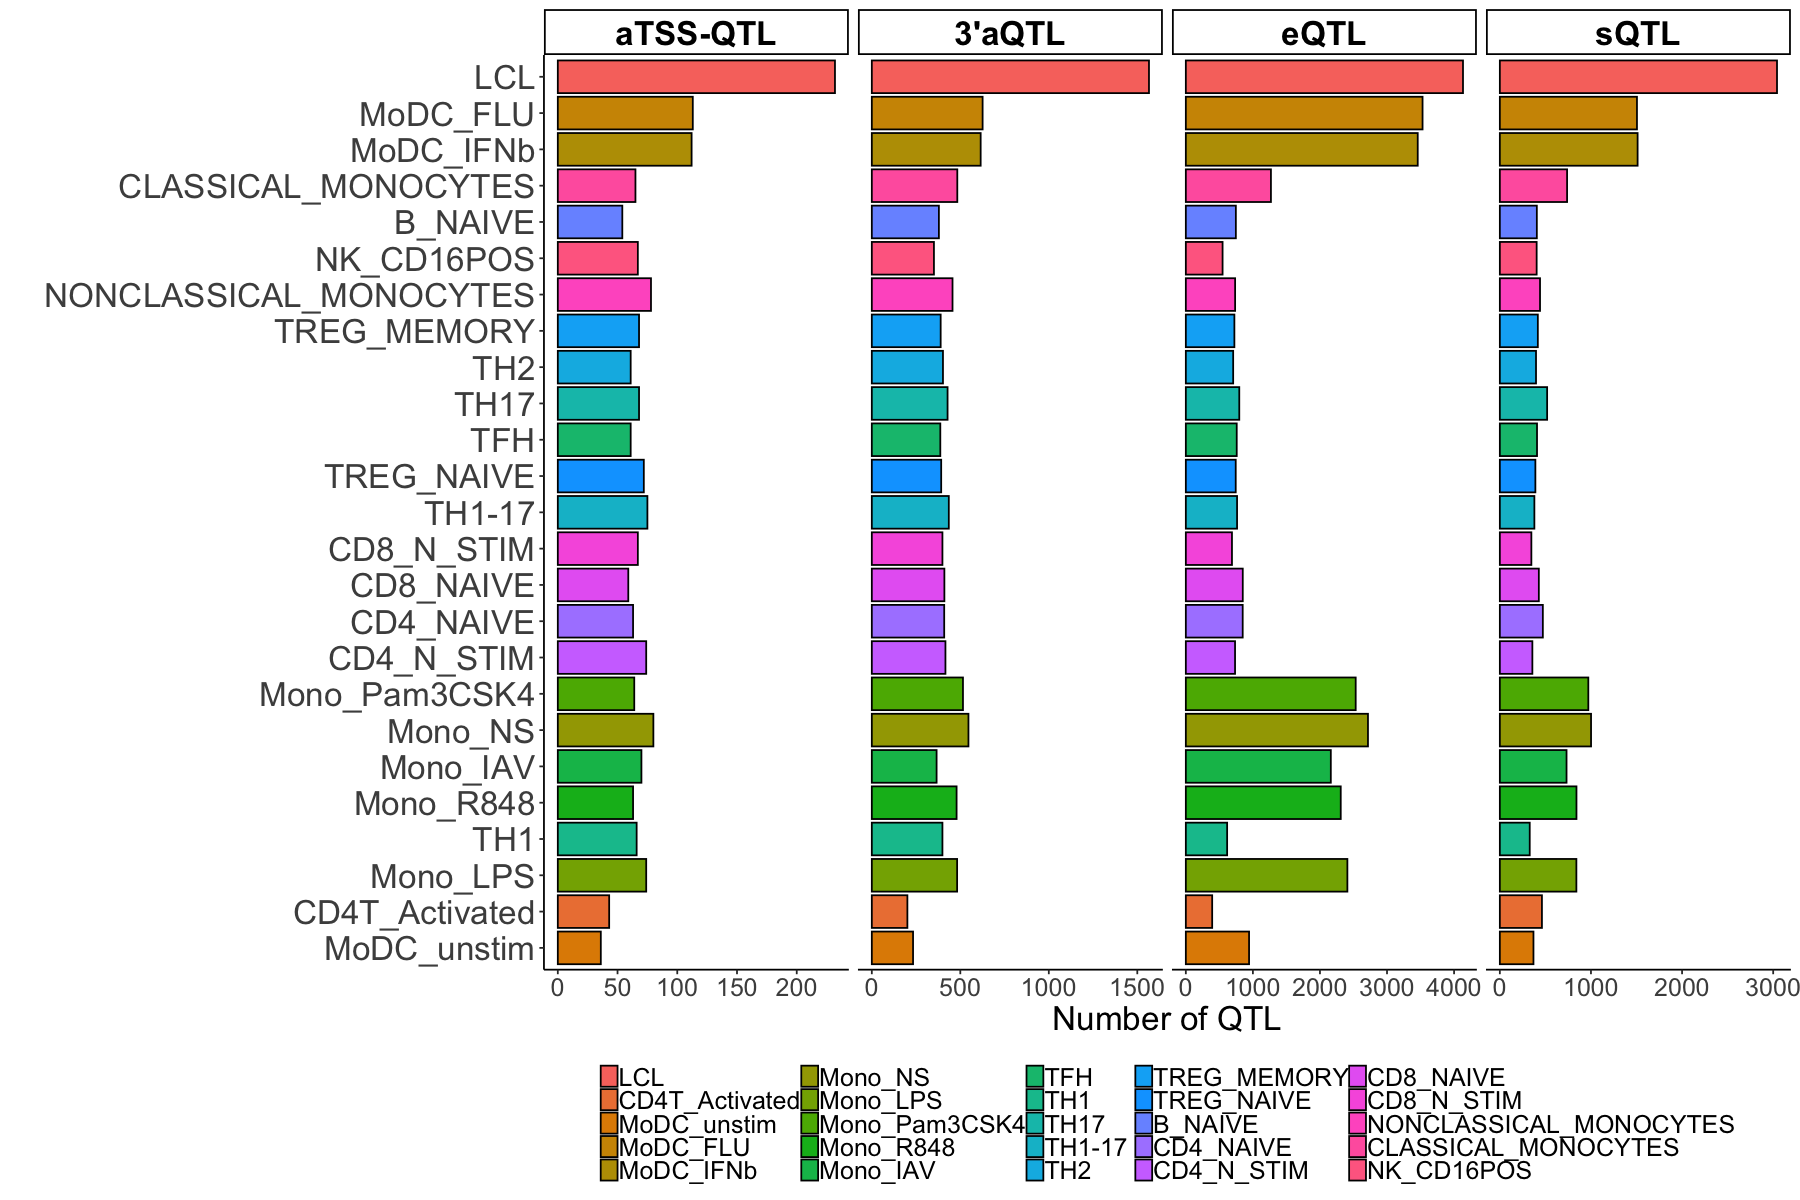

In [12]:
# number of QTL variants(lead variants per eGenes or eIsoforms, p<1e<-05)

options(repr.plot.width=15, repr.plot.height=10)
dat %>%
  dplyr::group_by(QTL,condition) %>%
  dplyr::summarize(count = n()) %>%
  dplyr::ungroup() %>%
  as.data.frame() %>%
  dplyr::mutate(QTL = case_when(
    QTL == "5UTR" ~ "aTSS-QTL",
    QTL == "3UTR" ~ "3'aQTL",
    QTL == "cis" ~ "eQTL",
    QTL == "splicing" ~ "sQTL"
  ),
  QTL = factor(QTL,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
  condition = factor(condition,levels=c("LCL",
                                        "CD4T_Activated","MoDC_unstim","MoDC_FLU","MoDC_IFNb",
                                        "Mono_NS","Mono_LPS","Mono_Pam3CSK4","Mono_R848","Mono_IAV",
                                        "TFH","TH1","TH17","TH1-17","TH2","TREG_MEMORY","TREG_NAIVE","B_NAIVE","CD4_NAIVE","CD4_N_STIM","CD8_NAIVE","CD8_N_STIM","NONCLASSICAL_MONOCYTES","CLASSICAL_MONOCYTES","NK_CD16POS"))) %>%
  merge(.,data.frame(
    condition = 
      c("LCL",
        "CD4T_Activated","MoDC_unstim","MoDC_FLU","MoDC_IFNb",
        "Mono_NS","Mono_LPS","Mono_Pam3CSK4","Mono_R848","Mono_IAV",
        "TFH","TH1","TH17","TH1-17","TH2","TREG_MEMORY","TREG_NAIVE","B_NAIVE","CD4_NAIVE","CD4_N_STIM","CD8_NAIVE","CD8_N_STIM","NONCLASSICAL_MONOCYTES","CLASSICAL_MONOCYTES","NK_CD16POS"),
    sample_size = 
      c(373,
        89,55,167,152,
        100,95,100,98,99,
        104,95,104,103,104,104,103,106,101,100,102,102,105,106,105)),
    by="condition") %>%
  ggplot(., aes(x=reorder(condition,sample_size), y=count, fill=condition)) +
  geom_bar(stat="identity", color="black", position=position_dodge())+
  theme_classic() +
  ylab("Number of QTL") +
  xlab("") +
  coord_flip() +
  facet_grid( . ~ QTL , scales = "free") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        legend.position = "bottom",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

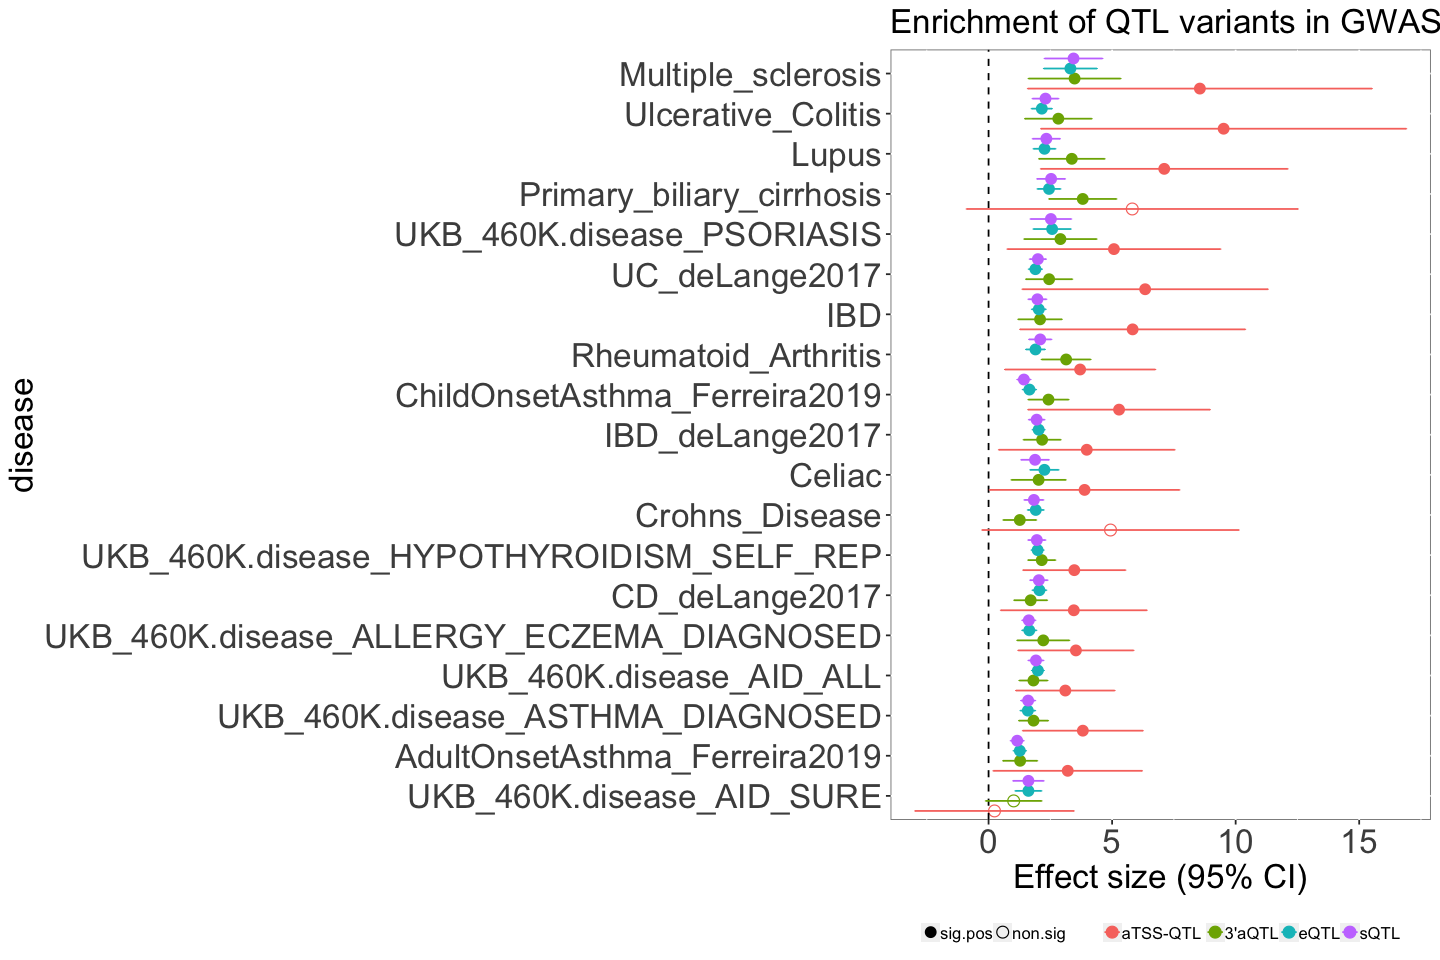

In [8]:
# Enrichment of QTLs

options(repr.plot.width=12, repr.plot.height=8)
## immune disorders
enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Enrichment-1.96*Enrichment_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  pheno %in% blood ~ "blood",
                  pheno %in% biochemistry ~ "biochemistry",
                  pheno %in% body ~ "body",
                  pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  pheno %in% behavior ~ "behavior",
                  pheno %in% repro ~ "repro",
                  pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno)) %>%
  dplyr::filter(group == "immune") %>%
  ggplot(., 
         aes(x=reorder(pheno,Enrichment), y=Enrichment, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 1),size = 3) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Enrichment of QTL variants in GWAS"), 
       y = "Effect size (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Enrichment-1.96*Enrichment_std_error, ymax = Enrichment+1.96*Enrichment_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 1)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

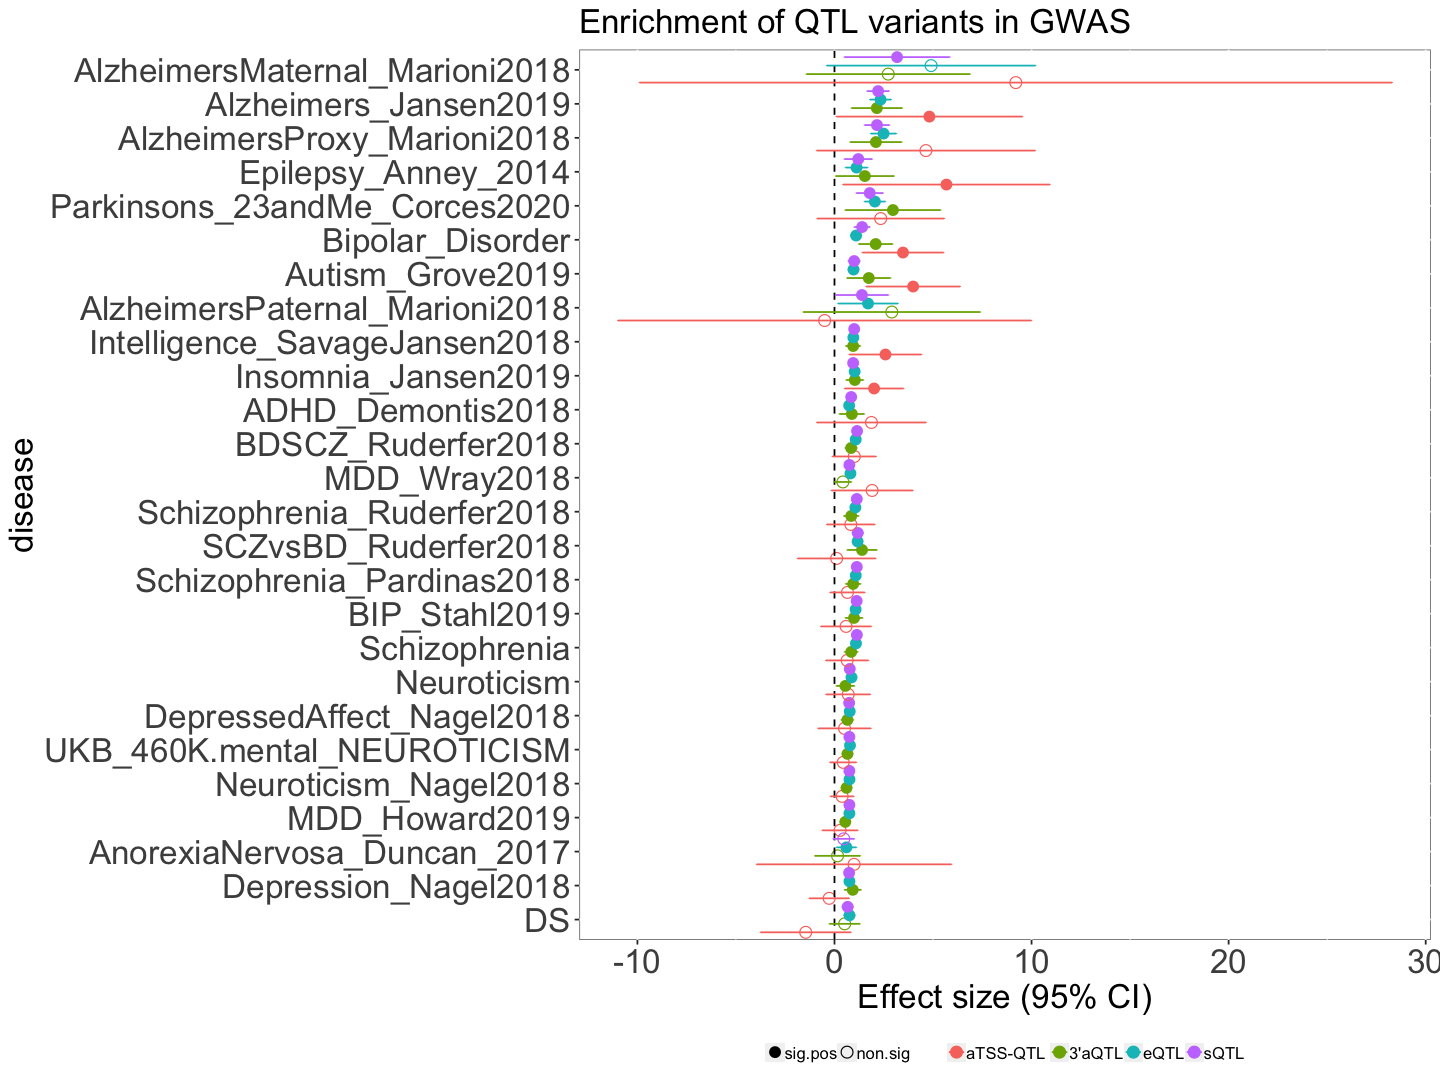

In [9]:
## CNS
options(repr.plot.width=12, repr.plot.height=9)
enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Enrichment-1.96*Enrichment_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  pheno %in% blood ~ "blood",
                  pheno %in% biochemistry ~ "biochemistry",
                  pheno %in% body ~ "body",
                  pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  pheno %in% behavior ~ "behavior",
                  pheno %in% repro ~ "repro",
                  pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno)) %>%
  dplyr::filter(group == "CNS") %>%
  ggplot(., 
         aes(x=reorder(pheno,Enrichment), y=Enrichment, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 1),size = 3) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Enrichment of QTL variants in GWAS"), 
       y = "Effect size (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Enrichment-1.96*Enrichment_std_error, ymax = Enrichment+1.96*Enrichment_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 1)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

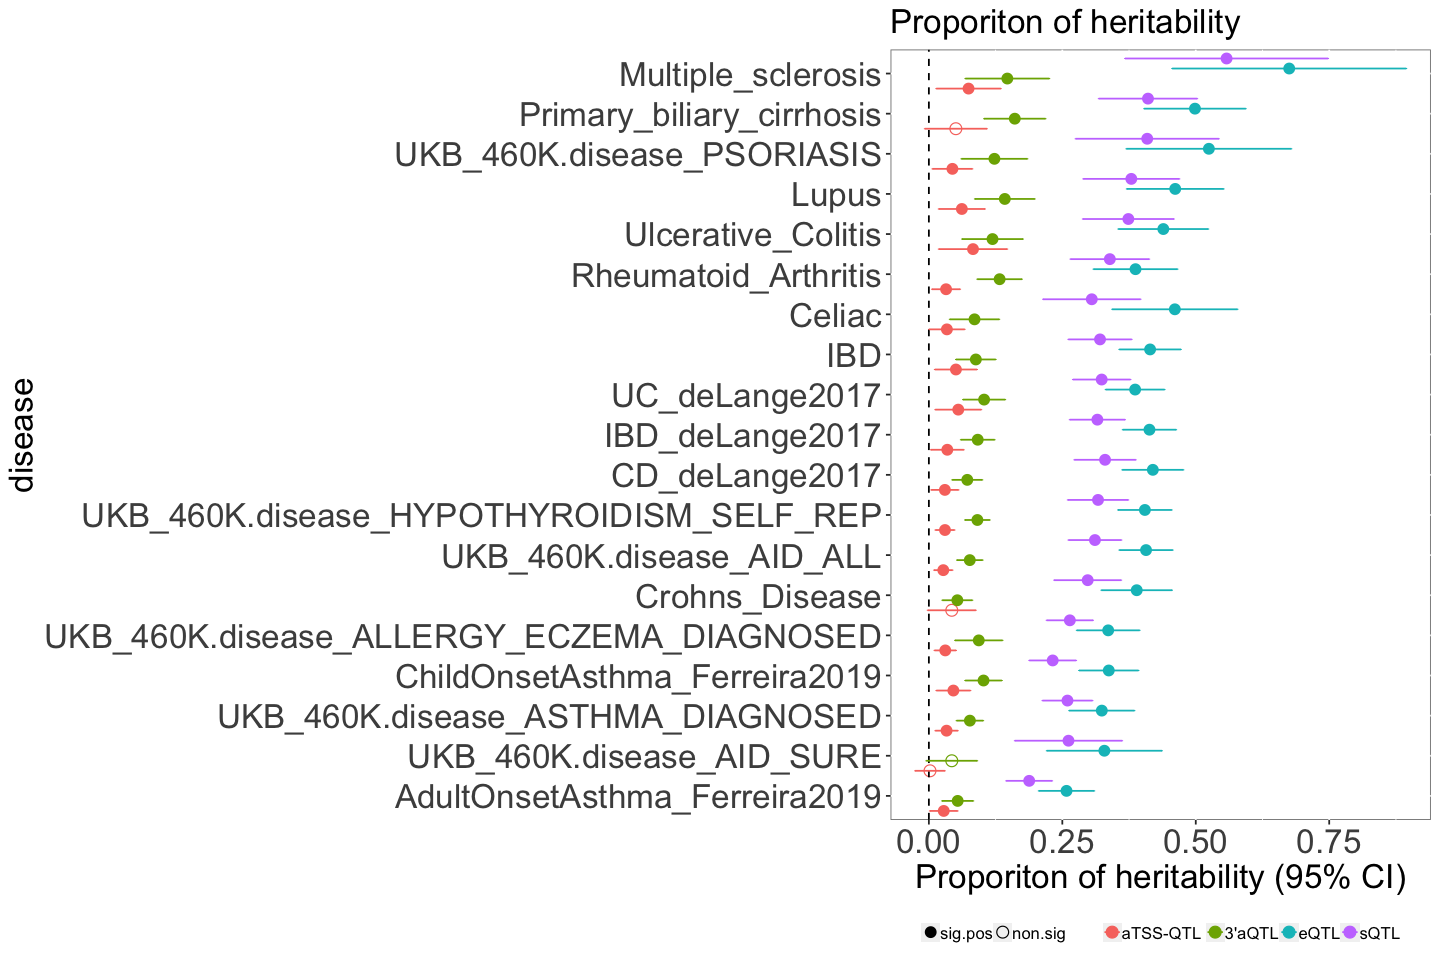

In [10]:
# Proportion of heritability

## immune disorders
options(repr.plot.width=12, repr.plot.height=8)
enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Prop._h2-1.96*Prop._h2_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  pheno %in% blood ~ "blood",
                  pheno %in% biochemistry ~ "biochemistry",
                  pheno %in% body ~ "body",
                  pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  pheno %in% behavior ~ "behavior",
                  pheno %in% repro ~ "repro",
                  pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno)) %>%
  dplyr::filter(group == "immune") %>%
  ggplot(., 
         aes(x=reorder(pheno,Prop._h2), y=Prop._h2, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 1),size = 3) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Proporiton of heritability"), 
       y = "Proporiton of heritability (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Prop._h2-1.96*Prop._h2_std_error, ymax = Prop._h2+1.96*Prop._h2_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 1)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

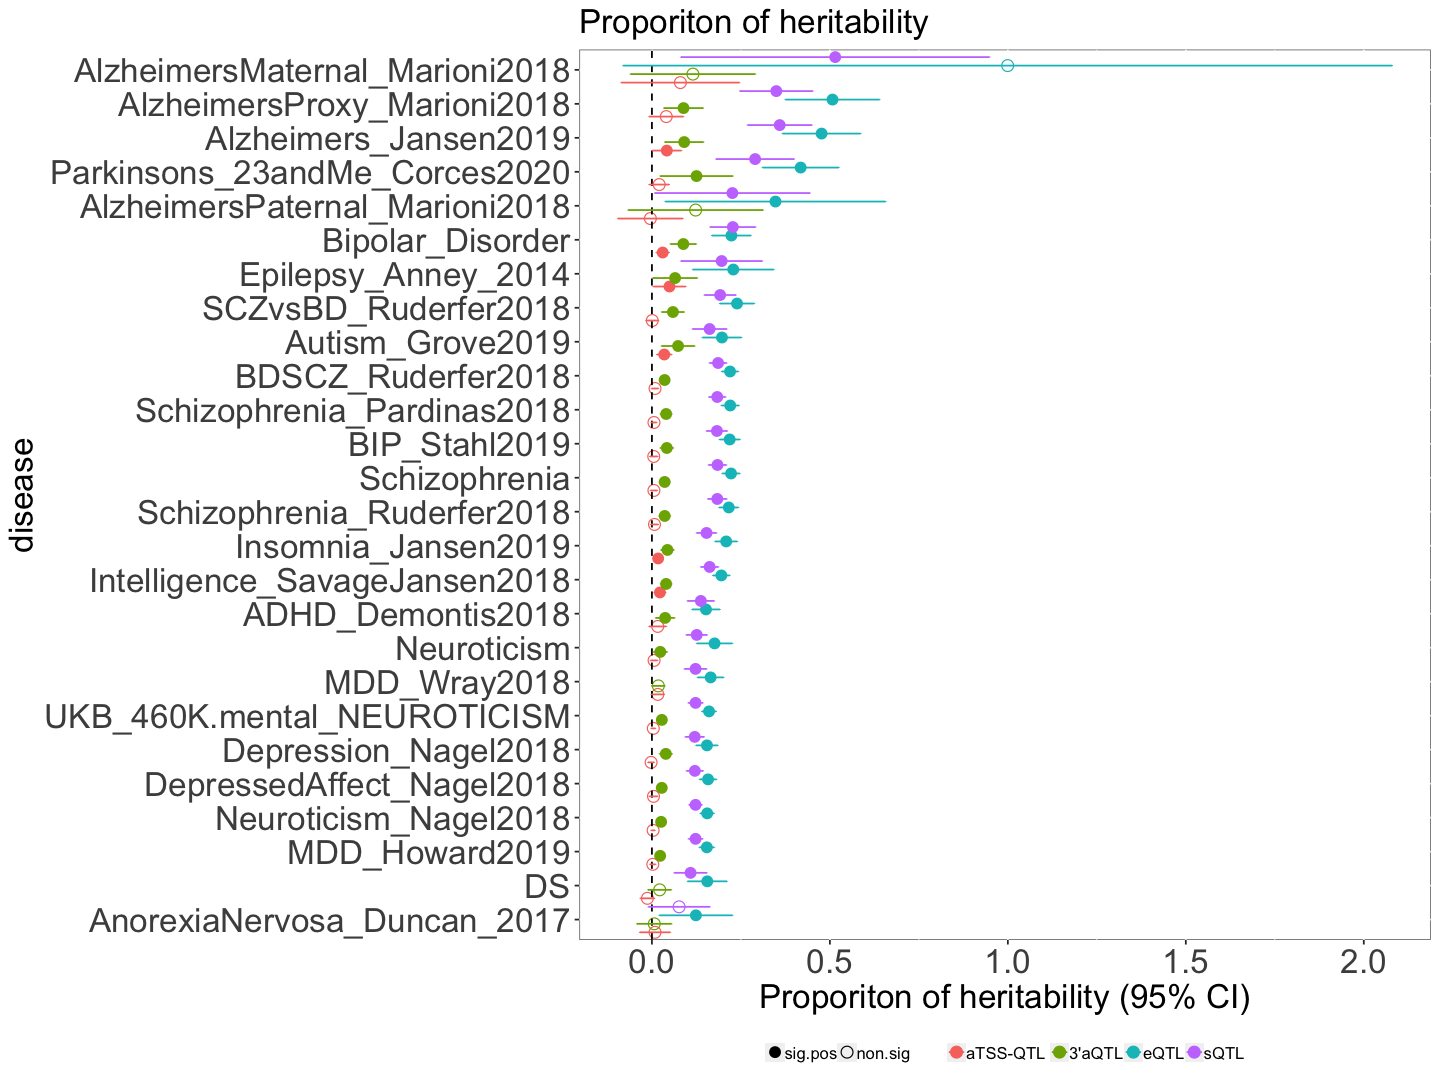

In [11]:
## CNS
options(repr.plot.width=12, repr.plot.height=9)
enr %>%
  dplyr::filter(Category == "L2_0" & pheno %in% pheno_lt) %>%
  dplyr::mutate(shape = ifelse(Prop._h2-1.96*Prop._h2_std_error>0, "sig.pos", "non.sig"),
                feature = case_when(
                  feature == "FIVE_UTR-PDUI" ~ "aTSS-QTL",
                  feature == "THREE_UTR-PDUI" ~ "3'aQTL",
                  feature == "eQTL" ~ "eQTL",
                  feature == "sQTL" ~ "sQTL"
                ),
                feature = factor(feature,levels=c("aTSS-QTL","3'aQTL","eQTL","sQTL")),
                group = case_when(
                  pheno %in% immune ~ "immune",
                  pheno %in% CNS ~ "CNS",
                  pheno %in% cancer ~ "cancer",
                  pheno %in% blood ~ "blood",
                  pheno %in% biochemistry ~ "biochemistry",
                  pheno %in% body ~ "body",
                  pheno %in% CVD ~ "CVD",
                  pheno %in% metabo ~ "metabo",
                  pheno %in% behavior ~ "behavior",
                  pheno %in% repro ~ "repro",
                  pheno %in% intel ~ "intel",
                  TRUE ~ "others"
                ),
                pheno = gsub("PASS_","",pheno)) %>%
  dplyr::filter(group == "CNS") %>%
  ggplot(., 
         aes(x=reorder(pheno,Prop._h2), y=Prop._h2, color=feature, shape=shape)) +
  geom_point(aes(color=feature,shape=shape), na.rm=TRUE, position=position_dodge(width = 1),size = 3) +
  scale_shape_manual(values = c("sig.pos"=16,"non.sig"=1)) +
  coord_flip() +
  geom_hline(yintercept = 0, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Proporiton of heritability"), 
       y = "Proporiton of heritability (95% CI)", 
       x = "disease") +
  geom_errorbar(aes(ymin = Prop._h2-1.96*Prop._h2_std_error, ymax = Prop._h2+1.96*Prop._h2_std_error), 
                width = 0.1,na.rm=TRUE,position=position_dodge(width = 1)) +
  theme(strip.text.x=element_text(size=20, color="black"),
        strip.text.y=element_text(size=20, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 10), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))